## import libraries

In [1]:
import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
conn = psycopg2.connect(
    host = 'localhost',
    password = 'xyz',
    user = 'postgres',
    database = 'bookrecomsystem',
    port = '5432'
)

In [3]:
cur = conn.cursor()

# Table name fetch
cur.execute("""
    SELECT table_name 
    FROM information_schema.tables
    WHERE table_schema = 'public';
""")

tables = cur.fetchall()

print('All Table in database')
for table in tables:
    print(table[0])

All Table in database
books
ratings
users


In [4]:
for table in tables:
    table_name = table[0]   

    print('-'*50, f'{table_name}', '-'*50)

    # Row count
    count = pd.read_sql(f"SELECT COUNT(*) as count FROM {table_name}", conn)['count'].values[0]
    print("Count of records:", count)

    # Display top 4 rows
    display(pd.read_sql(f"SELECT * FROM {table_name} LIMIT 4", conn))

-------------------------------------------------- books --------------------------------------------------
Count of records: 271360


,isbn,book-title,book-author,year-of-publication,publisher,image-url-s,image-url-m,image-url-l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...


-------------------------------------------------- ratings --------------------------------------------------
Count of records: 1149780


,user-id,isbn,book-rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3


-------------------------------------------------- users --------------------------------------------------
Count of records: 278858


,user-id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0


In [5]:
books = pd.read_sql('SELECT * FROM "books" ; ', conn)
books.head(3)

,isbn,book-title,book-author,year-of-publication,publisher,image-url-s,image-url-m,image-url-l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [6]:
ratings = pd.read_sql('SELECT * FROM "ratings" ; ', conn)
ratings.head(3)

,user-id,isbn,book-rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [7]:
users = pd.read_sql('SELECT * FROM "users" ; ', conn)
users.head(3)

,user-id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


# Exploratory Data Analysis ( EDA )

## Data Preprocessing

In [8]:
# Check missing values
print("---------------- Ratings ----------------" )
print(ratings.isnull().sum())
print("\n---------------- Books ----------------" )
print(books.isnull().sum())
print("\n---------------- Users ----------------" )
print(users.isnull().sum())

---------------- Ratings ----------------
user-id        0
isbn           0
book-rating    0
dtype: int64

---------------- Books ----------------
isbn                   0
book-title             0
book-author            2
year-of-publication    0
publisher              2
image-url-s            0
image-url-m            0
image-url-l            3
dtype: int64

---------------- Users ----------------
user-id          0
location         0
age         110762
dtype: int64


In [9]:
# Check duplicate rows
print("Dupicate Values for Rating:- ", ratings.duplicated().sum())
print("Dupicate Values for Books:- ", books.duplicated().sum())
print("Dupicate Values for Users:- ", users.duplicated().sum())

Dupicate Values for Rating:-  0
Dupicate Values for Books:-  0
Dupicate Values for Users:-  0


# Users Table Analysis

In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user-id   278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [11]:
users = users.drop(columns=['age'])

In [12]:
users.head()

,user-id,location
0,1,"nyc, new york, usa"
1,2,"stockton, california, usa"
2,3,"moscow, yukon territory, russia"
3,4,"porto, v.n.gaia, portugal"
4,5,"farnborough, hants, united kingdom"


In [13]:
# Extract last part after the last comma (country)
users['country'] = users['location'].apply(lambda x: str(x).split(",")[-1].strip().lower() if pd.notnull(x) else None)

users[['location','country']].head()

,location,country
0,"nyc, new york, usa",usa
1,"stockton, california, usa",usa
2,"moscow, yukon territory, russia",russia
3,"porto, v.n.gaia, portugal",portugal
4,"farnborough, hants, united kingdom",united kingdom


In [14]:
# Remove rows where country is not defined (empty string or NaN)
users = users[users['country'].notnull()]   # remove NaN
users = users[users['country'] != ""]       # remove empty string

In [15]:
# Top 10 countries with most users
top_countries = users['country'].value_counts()
top_countries.head(10)

country
usa               139711
canada             21658
united kingdom     18538
germany            17043
spain              13147
australia          11784
italy              11266
france              3455
portugal            3325
new zealand         3097
Name: count, dtype: int64

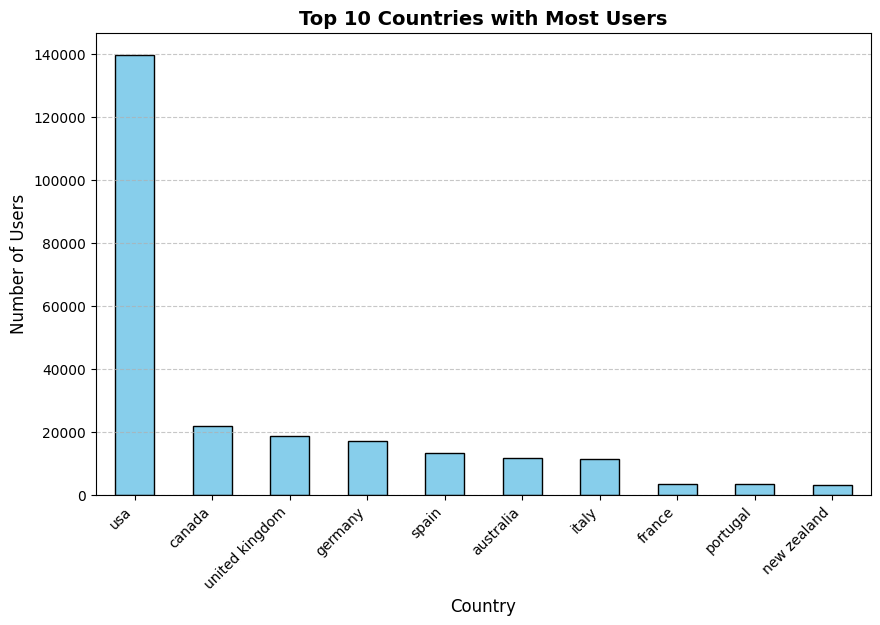

In [16]:
# Get Top 10 countries
top_10_countries = users['country'].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(10,6))
top_10_countries.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Top 10 Countries with Most Users", fontsize=14, fontweight='bold')
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [17]:
# Top 10 Cities with Most Users
users['city'] = users['location'].apply(lambda x: str(x).split(",")[0].strip().lower() if pd.notnull(x) else None)

top_cities = users['city'].value_counts()
top_cities.head(10)

city
london       4061
barcelona    2645
toronto      2286
madrid       1917
sydney       1863
melbourne    1845
portland     1824
vancouver    1645
chicago      1539
seattle      1503
Name: count, dtype: int64

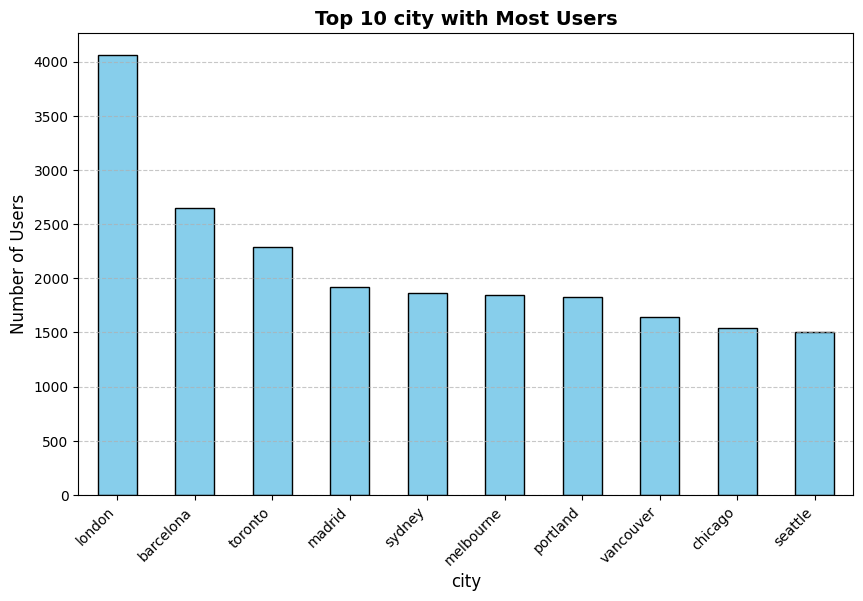

In [18]:
# Get Top 10 city
city = users['city'].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(10,6))
city.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Top 10 city with Most Users", fontsize=14, fontweight='bold')
plt.xlabel("city", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Books Table Analysis

In [19]:
books.head(3)

,isbn,book-title,book-author,year-of-publication,publisher,image-url-s,image-url-m,image-url-l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [20]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271360 non-null  object
 1   book-title           271360 non-null  object
 2   book-author          271358 non-null  object
 3   year-of-publication  271360 non-null  object
 4   publisher            271358 non-null  object
 5   image-url-s          271360 non-null  object
 6   image-url-m          271360 non-null  object
 7   image-url-l          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [21]:
books.shape

(271360, 8)

In [22]:
books["isbn"].shape

(271360,)

In [23]:
books = books.dropna(subset=['book-author', 'publisher'])

In [24]:
books = books.drop(columns=['image-url-s', 'image-url-m', 'image-url-l'])

In [25]:
books.shape

(271356, 5)

## 1. Count unique values

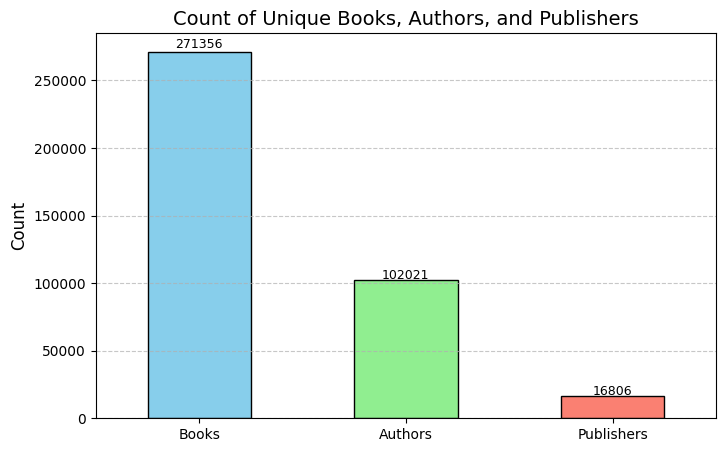

In [26]:
# Count unique values
unique_counts = {
    "Books": books['isbn'].nunique(),        # unique ISBN = unique books
    "Authors": books['book-author'].nunique(),
    "Publishers": books['publisher'].nunique()
}

# Convert to pandas Series for plotting
unique_counts_series = pd.Series(unique_counts)

# Plot
plt.figure(figsize=(8,5))
unique_counts_series.plot(kind='bar', color=['skyblue','lightgreen','salmon'], edgecolor='black')

plt.title("Count of Unique Books, Authors, and Publishers", fontsize=14)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels
for i, value in enumerate(unique_counts_series):
    plt.text(i, value + (value*0.01), str(value), ha='center', fontsize=9)

plt.show()

## 2. Top 10 most published authors

In [27]:
# Top 10 most published authors
top_authors = books['book-author'].value_counts().head(10)
top_authors

book-author
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: count, dtype: int64

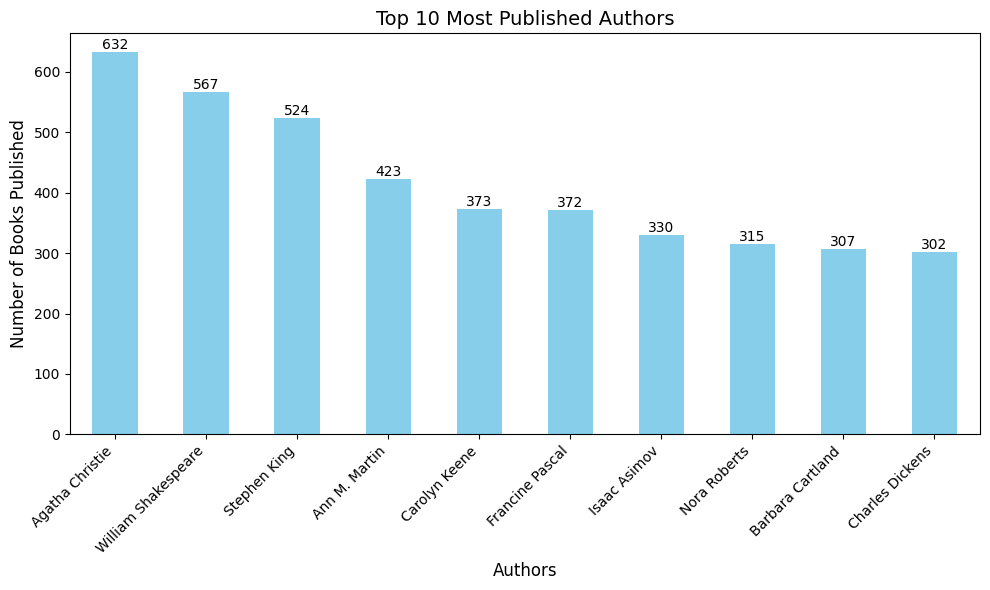

In [28]:
# Plot
plt.figure(figsize=(10,6))
bars = top_authors.plot(kind='bar', color='skyblue')

plt.title("Top 10 Most Published Authors", fontsize=14)
plt.xlabel("Authors", fontsize=12)
plt.ylabel("Number of Books Published", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels
for i, value in enumerate(top_authors.values):
    plt.text(i, value + 5, str(value), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## 3. Top 10 most common publication years

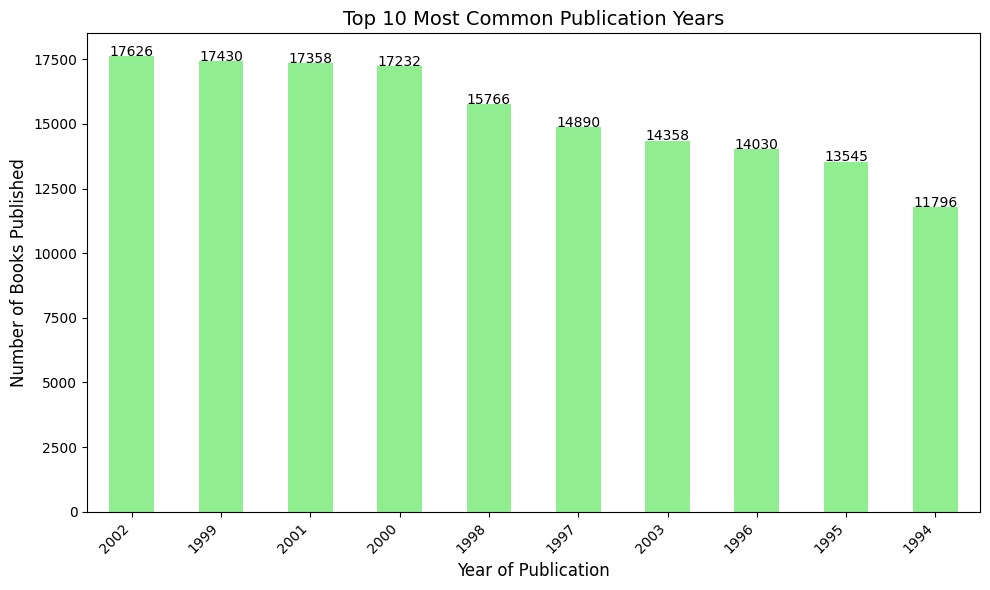

In [29]:
# Top 10 most common publication years
top_years = books['year-of-publication'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
bars = top_years.plot(kind='bar', color='lightgreen')

plt.title("Top 10 Most Common Publication Years", fontsize=14)
plt.xlabel("Year of Publication", fontsize=12)
plt.ylabel("Number of Books Published", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels
for i, value in enumerate(top_years.values):
    plt.text(i, value + 5, str(value), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Ratings Table Analysis

In [30]:
ratings.head(3)

,user-id,isbn,book-rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [31]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user-id      1149780 non-null  int64 
 1   isbn         1149780 non-null  object
 2   book-rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


## 1. Top 10 users who gave most ratings

In [32]:
# Number of ratings per user
user_ratings_count = ratings['user-id'].value_counts()
user_ratings_count.head(10)

user-id
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: count, dtype: int64

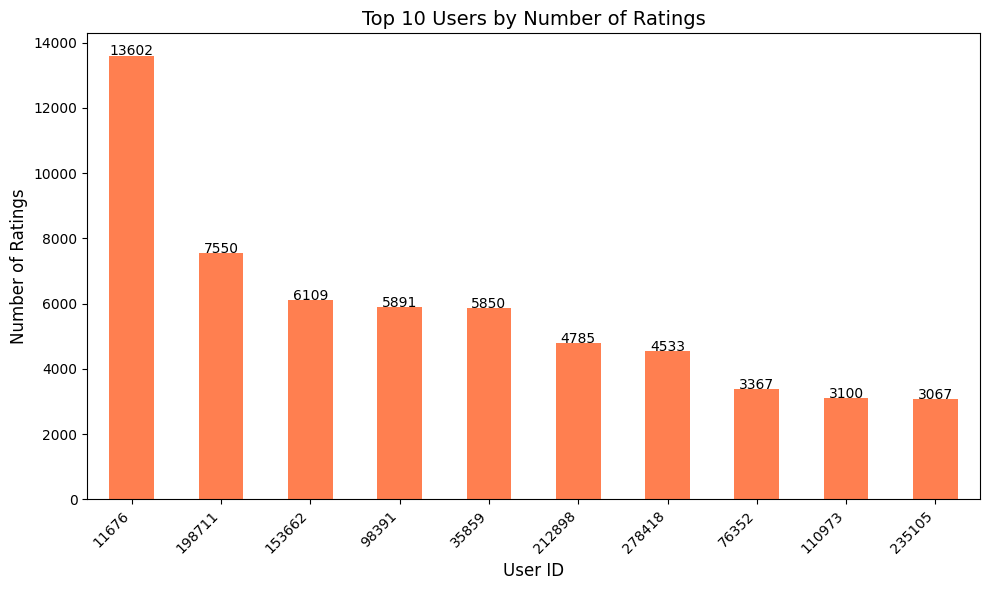

In [33]:
# Plot top 10 users
plt.figure(figsize=(10,6))
bars = user_ratings_count.head(10).plot(kind='bar', color='coral')

plt.title("Top 10 Users by Number of Ratings", fontsize=14)
plt.xlabel("User ID", fontsize=12)
plt.ylabel("Number of Ratings", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels
for i, value in enumerate(user_ratings_count.head(10).values):
    plt.text(i, value + 5, str(value), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Relationship between tables

In [34]:
ratings.columns

Index(['user-id', 'isbn', 'book-rating'], dtype='object')

In [35]:
books.columns

Index(['isbn', 'book-title', 'book-author', 'year-of-publication',
       'publisher'],
      dtype='object')

## 1. merge Rating with Books (on isbn) to see which books are most rated

In [36]:
# Merge ratings with books on ISBN
ratings_books = pd.merge(ratings, books, on='isbn')
ratings_books.head(3)

,user-id,isbn,book-rating,book-title,book-author,year-of-publication,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books


In [37]:
# Count number of ratings per book
book_ratings_count = ratings_books['book-title'].value_counts().head(10)
book_ratings_count

book-title
Wild Animus                                        2502
The Lovely Bones: A Novel                          1295
The Da Vinci Code                                   898
A Painted House                                     838
The Nanny Diaries: A Novel                          828
Bridget Jones's Diary                               815
The Secret Life of Bees                             774
Divine Secrets of the Ya-Ya Sisterhood: A Novel     740
The Red Tent (Bestselling Backlist)                 723
Angels &amp; Demons                                 670
Name: count, dtype: int64

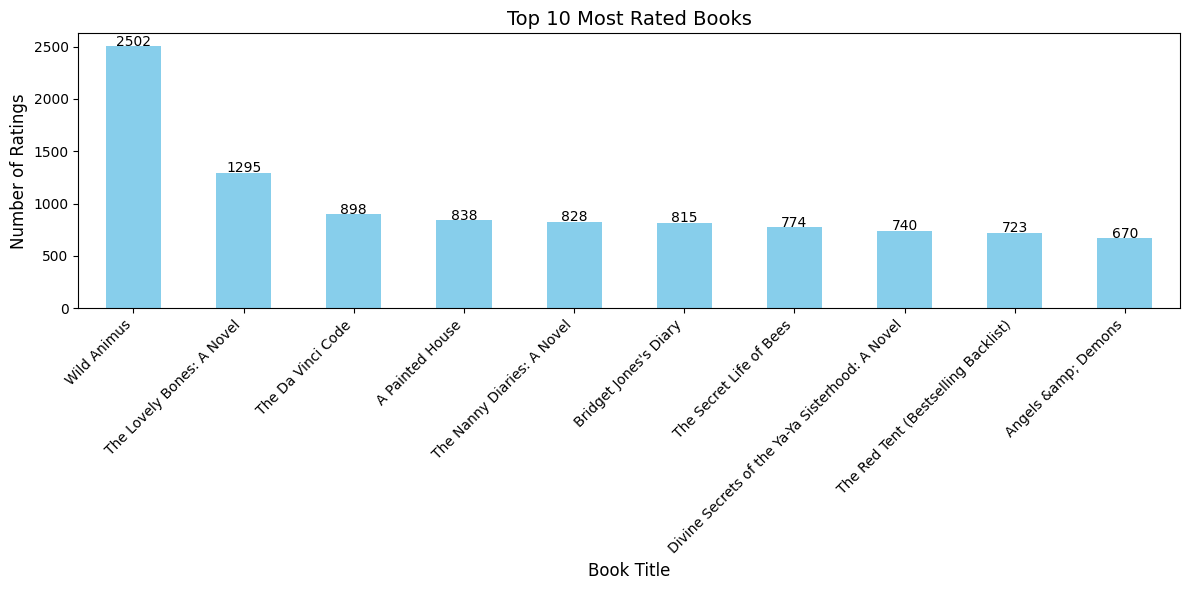

In [38]:
# Plot top 10 most rated books
plt.figure(figsize=(12,6))
bars = book_ratings_count.plot(kind='bar', color='skyblue')

plt.title("Top 10 Most Rated Books", fontsize=14)
plt.xlabel("Book Title", fontsize=12)
plt.ylabel("Number of Ratings", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels
for i, value in enumerate(book_ratings_count.values):
    plt.text(i, value + 5, str(value), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## 2. merge Rating with User to analyze rating trend by location

In [39]:
# Merge ratings with users
ratings_users = pd.merge(ratings, users, on='user-id')
ratings_users.head()

,user-id,isbn,book-rating,location,country,city
0,276725,034545104X,0,"tyler, texas, usa",usa,tyler
1,276726,0155061224,5,"seattle, washington, usa",usa,seattle
2,276727,0446520802,0,"h, new south wales, australia",australia,h
3,276729,052165615X,3,"rijeka, n/a, croatia",croatia,rijeka
4,276729,0521795028,6,"rijeka, n/a, croatia",croatia,rijeka


In [40]:
# Count number of ratings by country
ratings_by_country = ratings_users['country'].value_counts().head(10)
ratings_by_country

country
usa               768068
canada            103782
united kingdom     50593
germany            39675
australia          26477
spain              25742
france             13877
n/a                13639
italy              12147
portugal           10518
Name: count, dtype: int64

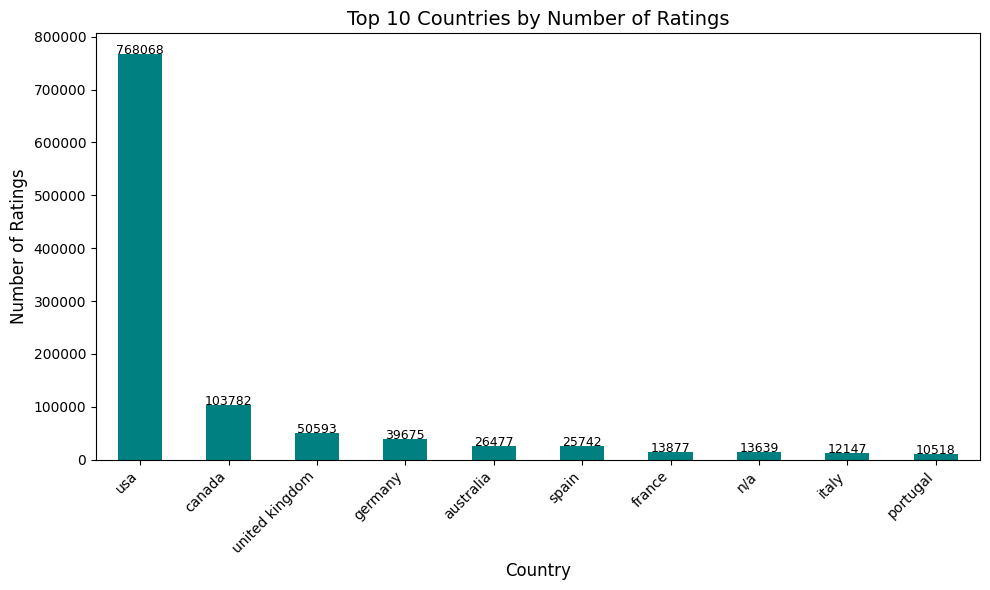

In [41]:
# Plot
plt.figure(figsize=(10,6))
bars = ratings_by_country.plot(kind='bar', color='teal')

plt.title("Top 10 Countries by Number of Ratings", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Ratings", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels
for i, value in enumerate(ratings_by_country.values):
    plt.text(i, value + 5, str(value), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

## 3. Aopular books : top 10 books with most rating

In [42]:
# Merge ratings with books on ISBN
ratings_books = pd.merge(ratings, books, on='isbn')

# Count number of ratings per book
popular_books = ratings_books.groupby('book-title')['book-rating'].count().sort_values(ascending=False).head(10)

print(popular_books)

book-title
Wild Animus                                        2502
The Lovely Bones: A Novel                          1295
The Da Vinci Code                                   898
A Painted House                                     838
The Nanny Diaries: A Novel                          828
Bridget Jones's Diary                               815
The Secret Life of Bees                             774
Divine Secrets of the Ya-Ya Sisterhood: A Novel     740
The Red Tent (Bestselling Backlist)                 723
Angels &amp; Demons                                 670
Name: book-rating, dtype: int64


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

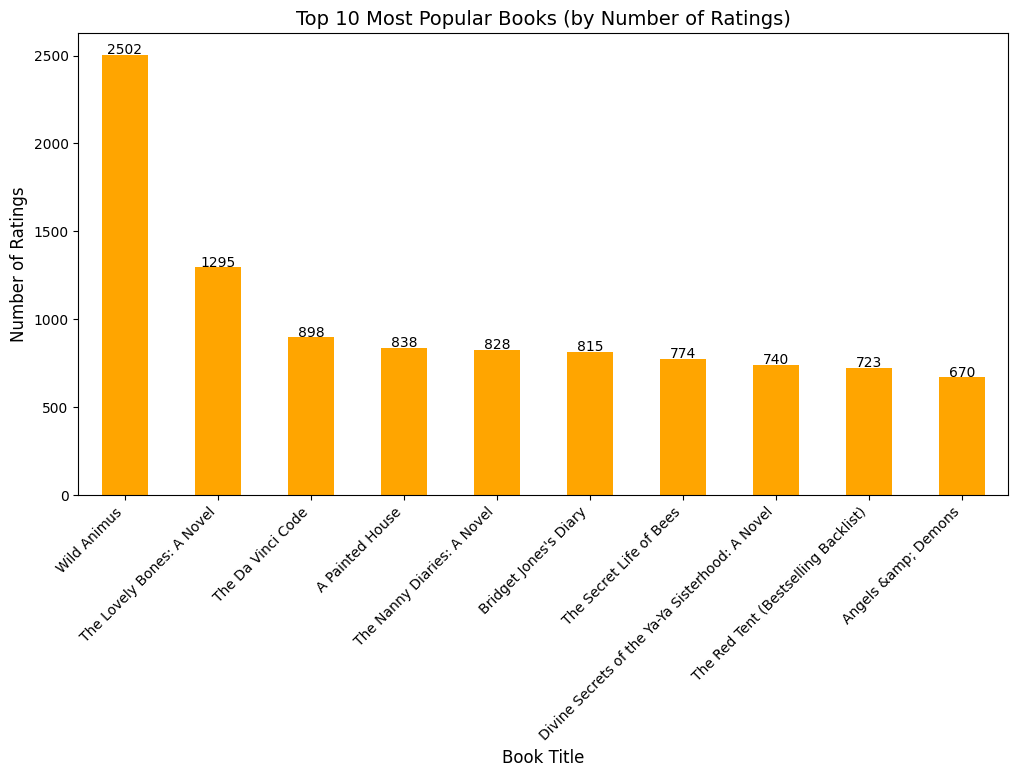

In [43]:
# Plot
plt.figure(figsize=(12,6))
bars = popular_books.plot(kind='bar', color='orange')

plt.title("Top 10 Most Popular Books (by Number of Ratings)", fontsize=14)
plt.xlabel("Book Title", fontsize=12)
plt.ylabel("Number of Ratings", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels
for i, value in enumerate(popular_books.values):
    plt.text(i, value + 5, str(value), ha='center', fontsize=10)

plt.tight_layout

## 4. Active users : top 10 users who rated the most books

In [44]:
# Count number of ratings per user
active_users = ratings['user-id'].value_counts().head(10)

print(active_users)

user-id
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: count, dtype: int64


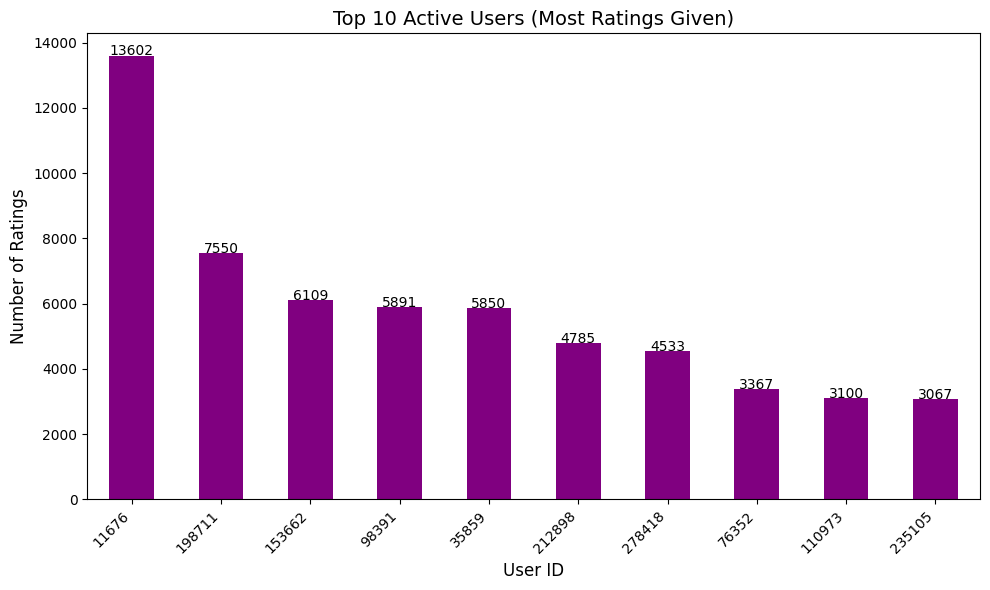

In [45]:
# Plot
plt.figure(figsize=(10,6))
bars = active_users.plot(kind='bar', color='purple')

plt.title("Top 10 Active Users (Most Ratings Given)", fontsize=14)
plt.xlabel("User ID", fontsize=12)
plt.ylabel("Number of Ratings", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels
for i, value in enumerate(active_users.values):
    plt.text(i, value + 5, str(value), ha='center', fontsize=10)

plt.tight_layout()
plt.show()